In [1]:
!pip install yfinance

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import yfinance as yf

In [4]:
stock_symbol = "AAPL"

df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")
df.head()

/tmp/ipython-input-534422796.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237555,24.705324,23.798604,24.694239,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556959,23.816338,23.195601,23.619033,263188400
2015-01-07,23.887278,23.987038,23.654501,23.765347,160423600
2015-01-08,24.805082,24.862723,24.097885,24.215383,237458000


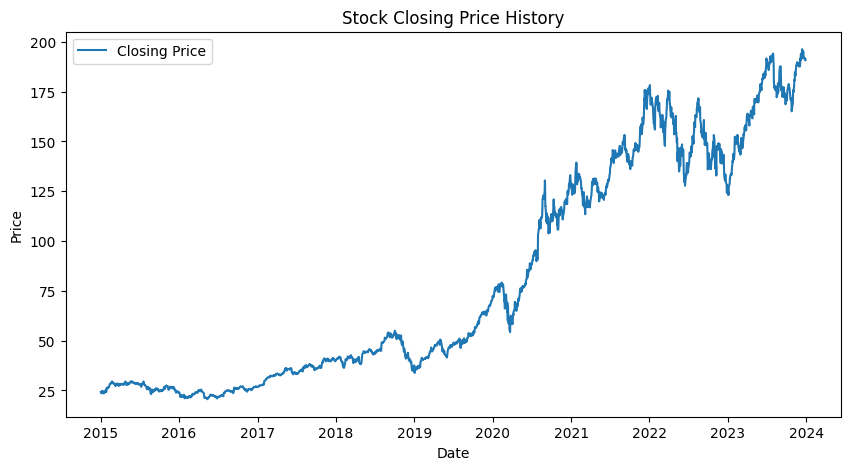

In [5]:
data = df[['Close']]
plt.figure(figsize=(10,5))
plt.plot(data, label='Closing Price')
plt.title("Stock Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [7]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

In [8]:
time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [12]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0281
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0018
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0025
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0016
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0018
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0021
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0017
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 0.0012
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.0021
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0015
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0011
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0012
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoch 15/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0012
Epoc

In [16]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual = scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


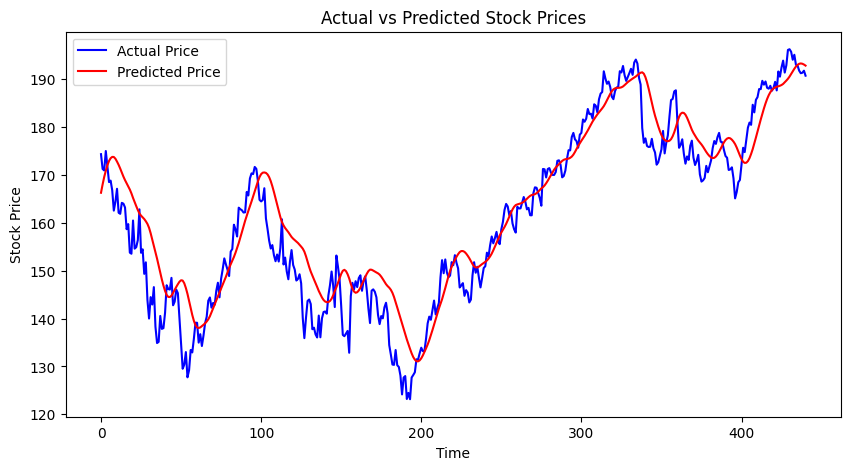

In [17]:
plt.figure(figsize=(10,5))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()